In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
imdb_data = pd.read_csv('IMDB_reviews_preprocessed.csv')
imdb_data.head()

,review,sentiment
0,one reviewer mentioned watching 1 oz episode y...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


In [3]:
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [4]:
import nltk
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Conv1D, GlobalMaxPooling1D, LSTM


In [5]:
norm_train_reviews=imdb_data.review[:40000]
norm_test_reviews=imdb_data.review[40000:]

In [6]:
#labeling the sentiment data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]

In [7]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(norm_train_reviews)
X_train = tokenizer.texts_to_sequences(norm_train_reviews)
X_test = tokenizer.texts_to_sequences(norm_test_reviews)

In [8]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [9]:
embeddings_dictionary = dict()
glove_file = open('../../data/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [10]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [11]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          18184400  
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10001     
Total params: 18,194,401
Trainable params: 10,001
Non-trainable params: 18,184,400
_________________________________________________________________
None


In [13]:
history = model.fit(X_train, train_sentiments, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 2s 53us/step - loss: 0.5591 - acc: 0.7128 - val_loss: 0.5145 - val_acc: 0.7511
Epoch 2/6
32000/32000 [==============================] - 1s 38us/step - loss: 0.4552 - acc: 0.7916 - val_loss: 0.5223 - val_acc: 0.7461
Epoch 3/6
32000/32000 [==============================] - 1s 34us/step - loss: 0.4184 - acc: 0.8120 - val_loss: 0.5109 - val_acc: 0.7546
Epoch 4/6
32000/32000 [==============================] - 1s 38us/step - loss: 0.3954 - acc: 0.8241 - val_loss: 0.5186 - val_acc: 0.7535
Epoch 5/6
32000/32000 [==============================] - 1s 36us/step - loss: 0.3800 - acc: 0.8322 - val_loss: 0.5236 - val_acc: 0.7598
Epoch 6/6
32000/32000 [==============================] - 1s 45us/step - loss: 0.3661 - acc: 0.8403 - val_loss: 0.5311 - val_acc: 0.7582


In [14]:
score = model.evaluate(X_test, test_sentiments, verbose=1)

10000/10000 [==============================] - 0s 44us/step


In [15]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5241149535179138
Test Accuracy: 0.7577000260353088


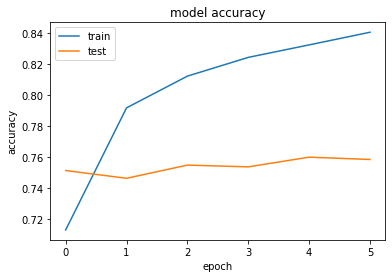

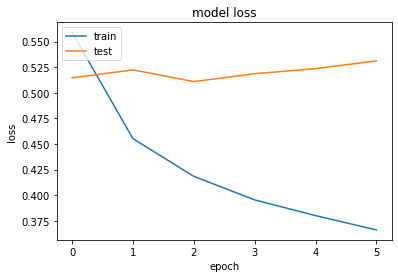

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### CNNs

In [17]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          18184400  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 18,248,657
Trainable params: 64,257
Non-trainable params: 18,184,400
_________________________________________________________________
None


In [18]:
history = model.fit(X_train, train_sentiments, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 13s 405us/step - loss: 0.4568 - acc: 0.7831 - val_loss: 0.3867 - val_acc: 0.8230
Epoch 2/6
32000/32000 [==============================] - 13s 417us/step - loss: 0.3361 - acc: 0.8557 - val_loss: 0.3619 - val_acc: 0.8395
Epoch 3/6
32000/32000 [==============================] - 16s 493us/step - loss: 0.2822 - acc: 0.8843 - val_loss: 0.3487 - val_acc: 0.8455
Epoch 4/6
32000/32000 [==============================] - 17s 545us/step - loss: 0.2377 - acc: 0.9105 - val_loss: 0.3493 - val_acc: 0.8474
Epoch 5/6
32000/32000 [==============================] - 16s 514us/step - loss: 0.1981 - acc: 0.9301 - val_loss: 0.3515 - val_acc: 0.8485
Epoch 6/6
32000/32000 [==============================] - 15s 478us/step - loss: 0.1625 - acc: 0.9482 - val_loss: 0.3484 - val_acc: 0.8490


In [19]:
score = model.evaluate(X_test, test_sentiments, verbose=1)

10000/10000 [==============================] - 2s 222us/step


In [20]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.34206888659000395
Test Accuracy: 0.8569999933242798


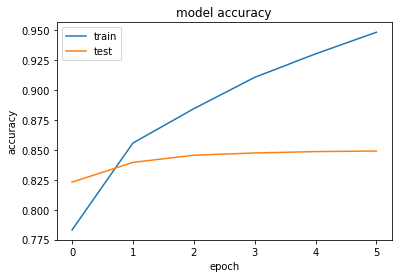

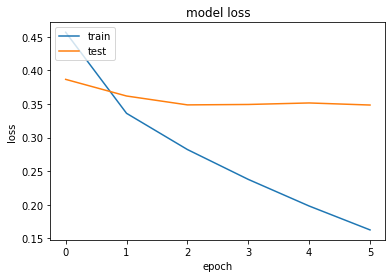

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### LSTM

In [22]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          18184400  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 18,301,777
Trainable params: 117,377
Non-trainable params: 18,184,400
_________________________________________________________________
None


In [23]:
history = model.fit(X_train, train_sentiments, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 116s 4ms/step - loss: 0.5131 - acc: 0.7462 - val_loss: 0.4267 - val_acc: 0.8052
Epoch 2/6
32000/32000 [==============================] - 110s 3ms/step - loss: 0.4159 - acc: 0.8143 - val_loss: 0.4405 - val_acc: 0.8216
Epoch 3/6
32000/32000 [==============================] - 111s 3ms/step - loss: 0.3674 - acc: 0.8400 - val_loss: 0.3990 - val_acc: 0.8281
Epoch 4/6
32000/32000 [==============================] - 110s 3ms/step - loss: 0.3457 - acc: 0.8524 - val_loss: 0.3849 - val_acc: 0.8341
Epoch 5/6
32000/32000 [==============================] - 110s 3ms/step - loss: 0.3196 - acc: 0.8642 - val_loss: 0.3413 - val_acc: 0.8516
Epoch 6/6
32000/32000 [==============================] - 115s 4ms/step - loss: 0.3040 - acc: 0.8728 - val_loss: 0.3248 - val_acc: 0.8605


In [24]:
score = model.evaluate(X_test, test_sentiments, verbose=1)

10000/10000 [==============================] - 15s 1ms/step


In [25]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3166528911113739
Test Accuracy: 0.8629999756813049


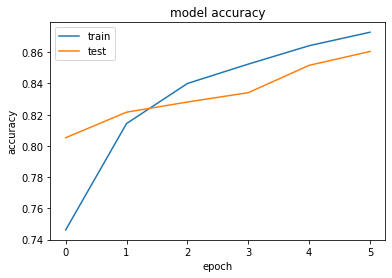

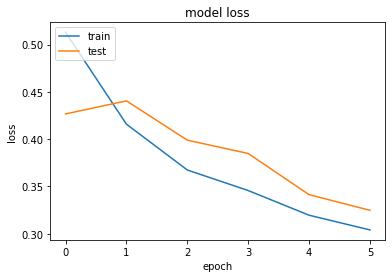

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()